## Table of Content
   
1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)

 
5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary
 

The Management Team at Walt Disney wants to improve its Customer Service and is looking for an analytical solution that could provide an in-depth analysis of customer's Reviews Data of the given three Disney Theme Parks. 

The aim of the project is to develop a Business Solution based on the Sentiment Analysis that would help the Management Team to focus only on Concerns, Interests and improve its facilities and Services.

To achieve the above aim, we have performed Data Exploration to find out the Peak Time to visit each Theme park, their highest average Ratings, Major groups of Visitors etc.

The Following are the major Findings:-

In performing the Topic Modeling in Part F, G and H, it was found that most of the Visitors are concerned regarding the long waiting time and Food quality in theme parks. Also, in reading some of the significant reviews, it was also discovered that Visitors don't like to visit the HongKong Theme park as it is relatively very small and offers less rides and also serves poor Food quality. Lastly, Visitors are concerned for lack of shade area in hot weather.

Also, in answering Part F, it was discovered than most of the visitors are interested in IRON MAN, space mountain rides and shopping from Disney Outlets.

<a id = "cell_exploration"></a>
### 2. Data Exploration

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
import scipy
%matplotlib inline

In [ ]:
# #This only needs to run once to install Gensim package
# !pip install gensim 

In [63]:
from dfply import *

In [64]:
# Reading the Walt Disney File into a Pandas Dataframe.

df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

In [65]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [66]:
# View a summary of our data

print("Rows:        :", df.shape[0])
print("Columns:     :", df.shape[1])

Rows:        : 42656
Columns:     : 6


In [67]:
# Summary Statistics of Rating
df.Rating.describe()

count    42656.000000
mean         4.217695
std          1.063371
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [68]:
# Count all the unique categories in each column
df.nunique(axis = 0)

Review_ID            42636
Rating                   5
Year_Month             112
Reviewer_Location      162
Review_Text          42632
Branch                   3
dtype: int64

In [69]:
df.Branch.value_counts()

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64

In [70]:
df['Reviewer_Location'].value_counts()

United States                       14551
United Kingdom                       9751
Australia                            4679
Canada                               2235
India                                1511
                                    ...  
Timor-Leste                             1
Iraq                                    1
Namibia                                 1
Democratic Republic of the Congo        1
El Salvador                             1
Name: Reviewer_Location, Length: 162, dtype: int64

In [71]:
df['Year_Month'].value_counts()

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: Year_Month, Length: 112, dtype: int64

## Inspecting the Missing Values in Year_Month

In [72]:
# As we can see in the above value counts that there are missing dates in our dataset.

# Number of Missing dates in our dataset

print( "Number of missing dates: ",
      df[df.Year_Month == 'missing']\
      .shape[0])

Number of missing dates:  2613


In [73]:
# Percentage of missing data
df_dates = df[df['Year_Month'] == 'missing'].shape[0] * 100 / df.shape[0]

print("Percentage of Missing dates in our dataset: ", 
        df_dates, "%")

Percentage of Missing dates in our dataset:  6.1257501875468865 %


In [74]:
# Since its only about 6% of our entire data, we would remove the missing dates
# Dropping the Missing dates 

df = df[df['Year_Month'] != 'missing'].reset_index(drop = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40043 entries, 0 to 40042
Data columns (total 6 columns):
Review_ID            40043 non-null int64
Rating               40043 non-null int64
Year_Month           40043 non-null object
Reviewer_Location    40043 non-null object
Review_Text          40043 non-null object
Branch               40043 non-null object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [76]:
# We will also convert Year_Month into a datetime format 

from datetime import datetime as dt

df['Year_Month'] = pd.to_datetime(df['Year_Month']).dt.to_period('M')

In [77]:
# Creating a new Dataframe df2
df2 = df.copy()

# PART A

## Which period of the year is the peak time for visitor to visit each theme park?

In [78]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-04,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [79]:
# Adding the Month Column for further analysis
df.insert(loc=3, column='MONTH', value= df['Year_Month'].dt.month)

In [80]:
df.head()

,Review_ID,Rating,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-04,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05,5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


### Figure A.1

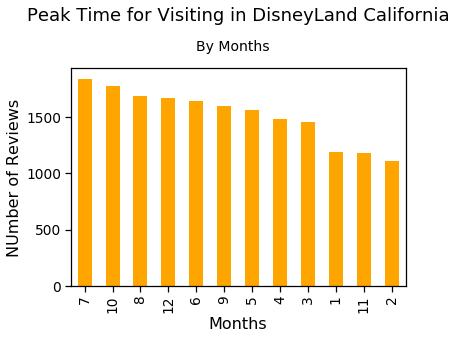

In [256]:
df_year_Cal = df[df['Branch'] == 'Disneyland_California']

df_year_Cal.MONTH.value_counts().plot(kind = 'bar', color = 'orange')
plt.title("Peak Time for Visiting in DisneyLand California\n\n", fontsize = 18);
plt.suptitle('By Months\n', fontsize = 14)
plt.xlabel("Months", fontsize = 16)
plt.ylabel("NUmber of Reviews", fontsize = 16);

### Figure A.2

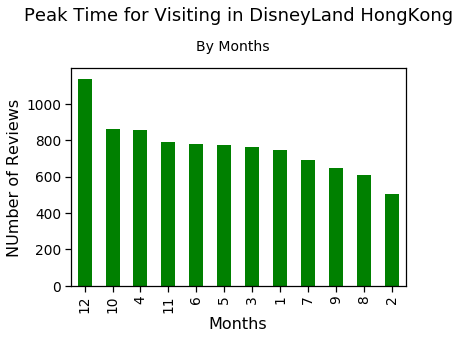

In [255]:
df_year_Hong = df[df['Branch'] == 'Disneyland_HongKong']

df_year_Hong.MONTH.value_counts().plot(kind = 'bar', color= 'green')
plt.title("Peak Time for Visiting in DisneyLand HongKong\n\n", fontsize = 18);
plt.suptitle('By Months\n', fontsize = 14)
plt.xlabel("Months", fontsize = 16)
plt.ylabel("NUmber of Reviews", fontsize = 16);

### Figure A.3

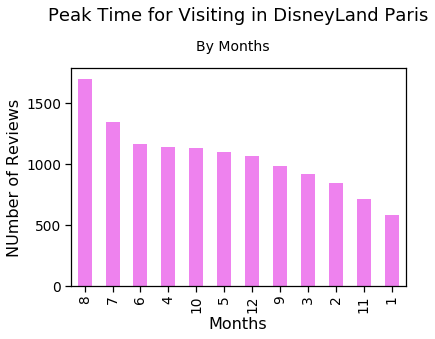

In [254]:
df_year_Paris = df[df['Branch'] == 'Disneyland_Paris']

df_year_Paris.MONTH.value_counts().plot(kind = 'bar', color= 'violet')
plt.title("Peak Time for Visiting in DisneyLand Paris\n\n", fontsize = 18);
plt.suptitle('By Months\n', fontsize = 14)
plt.xlabel("Months", fontsize = 16)
plt.ylabel("NUmber of Reviews", fontsize = 16);

## ANSWER ----------- > PART A

The Following is the Peak Time for visiting Each DisneyLand Park.

1. For DisneyLand California, July is the Peak Month, followed by October.


2. For DisneyLand HongKong, December is the Peak Month, followed by October and April.


3. For DsineyLand Paris, August is the Peak Month, followed by July.

# PART B

### Who are the major groups of visitors at each Disneyland Park?

In [178]:
df.head(3)

,Review_ID,Rating,Sent_ML,Label,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch_Encoded,Branch,Cleaned_doc_ML,Sent_Lexicon,Cleaned_doc_LDA
0,670772142,4,pos,1,2019-04,4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the ...,1,Disneyland_HongKong,ever disneyland anywher find disneyland hong kong veri similar layout walk main street veri fami...,neu,"[similar, layout, familiar, fabul, fairli]"
1,670682799,4,pos,1,2019-05,5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomo...",1,Disneyland_HongKong,sinc last time visit disneyland time onli stay tomorrowland marvel land iron experi newli open w...,pos,"[tomorrowland, marvel, iron, newli, ironman, featur, sceneri, central, kowloon, previou, lightye..."
2,670623270,4,pos,1,2019-04,4,United Arab Emirates,Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be...,1,Disneyland_HongKong,thank humid visit park otherwis would issu shade arriv around left unfortun last even parad hour...,pos,"[humid, otherwis, shade, unfortun, interest, themselv, longest, certain, underwhelm, grand, coff..."


In [179]:
pd.set_option('display.max_rows', 100)

### Figure B.1

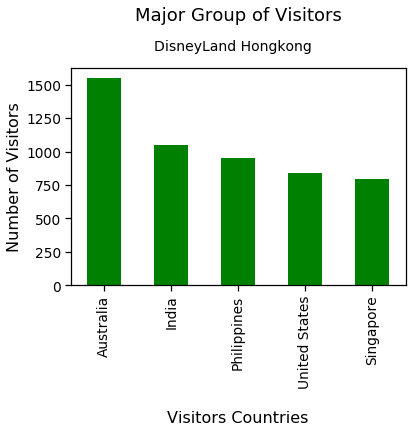

In [192]:
# Major groups of visitors at each Disneyland HongKong
# We have taken Only TOP 5 Visitors 


df_hongkong = df[df['Branch'] == 'Disneyland_HongKong']['Reviewer_Location']\
                .value_counts().sort_values(ascending = False).head(5)

df_hongkong.plot(kind = 'bar', color = 'green')
plt.title("Major Group of Visitors\n\n", fontsize = 18);
plt.suptitle('DisneyLand Hongkong\n', fontsize = 14)
plt.xlabel("\nVisitors Countries", fontsize = 16)
plt.ylabel("Number of Visitors", fontsize = 16);

### Figure B.2

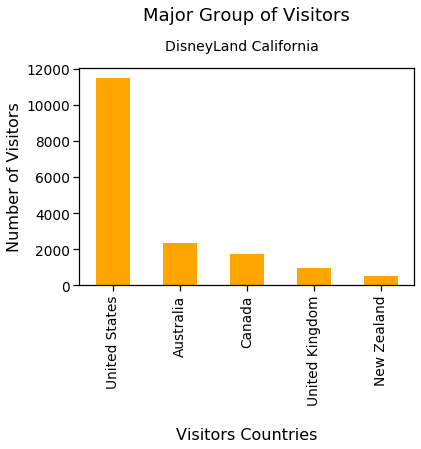

In [195]:
# major groups of visitors at each Disneyland California

df_california = df[df['Branch'] == 'Disneyland_California']['Reviewer_Location']\
                .value_counts().sort_values(ascending = False).head(5)

# print("\nThe major groups of visitors at Disneyland California is: ", "\n\n" ,
#          df_california)

df_california.plot(kind = 'bar', color = 'orange')
plt.title("Major Group of Visitors\n\n", fontsize = 18);
plt.suptitle('DisneyLand California\n', fontsize = 14)
plt.xlabel("\nVisitors Countries", fontsize = 16)
plt.ylabel("Number of Visitors", fontsize = 16);

### Figure B.3

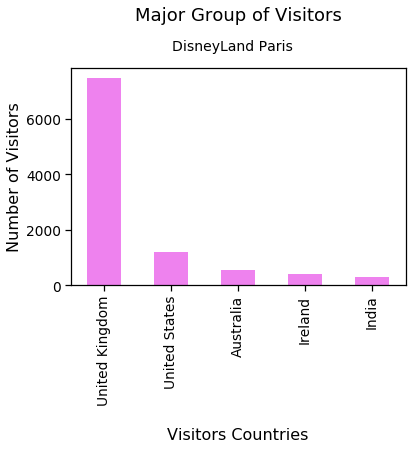

In [196]:
# major groups of visitors at each Disneyland Paris

df_paris = df[df['Branch'] == 'Disneyland_Paris']['Reviewer_Location']\
                .value_counts().sort_values(ascending = False).head(5)

df_paris.plot(kind = 'bar', color = 'violet')
plt.title("Major Group of Visitors\n\n", fontsize = 18);
plt.suptitle('DisneyLand Paris\n', fontsize = 14)
plt.xlabel("\nVisitors Countries", fontsize = 16)
plt.ylabel("Number of Visitors", fontsize = 16);

## ANSWER ----------- > PART B

The Major Group of Visitors for DisneyLand HongKong are:-

1. Australia
2. India
3. Philippines
4. United States
5. Singapore

The Major Group of Visitors for DisneyLand California are:-

1. United States 
2. Australia
3. Canada
4. United Kingdom
5. New Zealand

The Major Group of Visitors for DisneyLand Paris are:-

1. United Kingdom 
2. United States
3. Australia
4. Ireland
5. India


# PART C

### Which theme park received highest ratings?

In [91]:
df.head()

,Review_ID,Rating,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-04,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05,5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [92]:
df[df['Rating'] == df['Rating'].max()]['Branch'].value_counts()

Disneyland_California    11802
Disneyland_Paris          5768
Disneyland_HongKong       4338
Name: Branch, dtype: int64

### Table C.1

### It is assumed that the client needs the highest Average Rating 

In [93]:
# As we can see that all of the theme Parks has recieved a Rating of 5

df_Rating = df.groupby('Branch').agg({'Rating': 'mean'}).round(2)
df_Rating.style.highlight_max(color = 'lightgreen')

,Rating
Branch,
Disneyland_California,4.41
Disneyland_HongKong,4.22
Disneyland_Paris,3.98


## ANSWER ----------- > PART C

So, it can be concluded from the above Table that "DISNEYLAND CALIFORNIA" has recieved the Highest Average Rating of **4.41**

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

# Part D

### How to automatically summarize visitors’ sentiments from reviews?

In [95]:
df.head()

,Review_ID,Rating,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-04,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05,5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


## Machine Learning

In [96]:
# Adding the Label Column 
# Label = 0 ---> Ratings less than 3      -----> 'Negative'
# Label = 1 ---> Ratings greater than 3   -----> 'Positive'
# Label = 2 ---> Ratings equal to 3       -----> 'Neutral'
df.insert(loc=2, column='Label',   value= [1 if x > 3 else 2 if x == 3 else 0 for x in df['Rating']])

In [97]:
df.head()

,Review_ID,Rating,Label,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch
0,670772142,4,1,2019-04,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,1,2019-05,5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,1,2019-04,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,1,2019-04,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,1,2019-04,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


## Data Cleansing

### Preprocessing the Reviews

In [98]:
# Cleaning the Review Text 

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

df['Review_Text'] = preprocess(df['Review_Text']) #Clean text

## Tokenizating and Stemming

In [101]:
from nltk.stem import PorterStemmer #Stemming Package  
import re  #Regular expression operation package

porter = PorterStemmer()

documents = df['Review_Text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review) 
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # apply stemming operation (Optional)
        for t in range(len(Tokens)):
            Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3] 
        review = ' '.join(Filtered_token)        
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(review)

Cleaned_doc[0]

'ever been disneyland anywher find disneyland hong kong veri similar layout when walk into main street veri familiar feel ride small world absolut fabul worth visit fairli busi queue move fairli well'

## Removing the Stopwords

In [102]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

Cleaned_doc[0]

'ever disneyland anywher find disneyland hong kong veri similar layout walk main street veri familiar feel ride small world absolut fabul worth visit fairli busi queue move fairli well'

In [103]:
# Creating a separate Cleaned review Column for Machine Learning Approach
df['Cleaned_doc_ML'] = Cleaned_doc
df.head(3)

,Review_ID,Rating,Label,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch,Cleaned_doc_ML
0,670772142,4,1,2019-04,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,ever disneyland anywher find disneyland hong k...
1,670682799,4,1,2019-05,5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,sinc last time visit disneyland time onli stay...
2,670623270,4,1,2019-04,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thank humid visit park otherwis would issu sha...


## Creating Bag of Words Features

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,3),tokenizer = token.tokenize)

text_counts = cv.fit_transform(df['Cleaned_doc_ML'])
print('Bag of Word Matrix size: ', text_counts.shape)
print('Data in the first row:\n', text_counts[1,:])

Bag of Word Matrix size:  (40043, 2109249)
Data in the first row:
   (0, 464889)	1
  (0, 1047079)	1
  (0, 1759050)	1
  (0, 659991)	2
  (0, 1978170)	1
  (0, 1048857)	1
  (0, 1651187)	1
  (0, 1850955)	2
  (0, 1200243)	1
  (0, 1741966)	1
  (0, 1887016)	1
  (0, 1075243)	1
  (0, 935967)	1
  (0, 900631)	1
  (0, 609229)	1
  (0, 1166979)	1
  (0, 1211530)	1
  (0, 2022811)	1
  (0, 901094)	1
  (0, 764319)	2
  (0, 658575)	1
  (0, 592129)	1
  (0, 560775)	1
  (0, 1596092)	1
  (0, 250310)	1
  :	:
  (0, 2013186)	1
  (0, 549636)	1
  (0, 101849)	1
  (0, 951690)	1
  (0, 814833)	1
  (0, 1785247)	1
  (0, 801481)	1
  (0, 1360175)	1
  (0, 520781)	1
  (0, 189246)	1
  (0, 1476503)	1
  (0, 493374)	1
  (0, 660175)	1
  (0, 124778)	1
  (0, 1048894)	1
  (0, 1759197)	1
  (0, 99866)	1
  (0, 412209)	1
  (0, 461555)	1
  (0, 1818920)	1
  (0, 1795090)	1
  (0, 753235)	1
  (0, 1384545)	1
  (0, 1733980)	1
  (0, 893376)	1


## Splitting the dataset into Testing and Training 

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Label'], test_size=0.3, random_state=1)

## Naive Bayes Model

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:", round(metrics.accuracy_score(y_test, predicted),3))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, predicted))

MultinomialNB Accuracy: 0.802
Confusion Matrix:
 [[  63  879   23]
 [   4 9541   15]
 [  16 1446   26]]


In [391]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      0.07      0.12       965
           1       0.80      1.00      0.89      9560
           2       0.41      0.02      0.03      1488

    accuracy                           0.80     12013
   macro avg       0.66      0.36      0.35     12013
weighted avg       0.75      0.80      0.72     12013



## Visualisations

In [108]:
df.head(2)

,Review_ID,Rating,Label,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch,Cleaned_doc_ML
0,670772142,4,1,2019-04,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,ever disneyland anywher find disneyland hong k...
1,670682799,4,1,2019-05,5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,sinc last time visit disneyland time onli stay...


In [109]:
# Adding the Sent_M Column --- > 
# Sen_M = 'neg' ---> Ratings less than 3
# Sen_M = 'pos' ---> Ratings greater than 3
# Sen_M = 'neu' ---> Ratings equal to 3
df.insert(loc=2, column='Sent_ML',   value= ['pos' if x > 3 else 'neu' if x == 3 else 'neg' for x in df['Rating']])

In [110]:
# Adding the Branch_encoded Column --- > 
# Branch_encoded = '0' ---> Branch = 'Disneyland_California'
# Branch_encoded = '1' ---> Branch = 'Disneyland_HongKong'
# Branch_encoded = '2' ---> Branch = 'Disneyland_Paris'
df.insert(loc=8, column='Branch_Encoded',
          value= [1 if x == 'Disneyland_HongKong' else 2 if x == 'Disneyland_Paris' else 3 for x in df['Branch']])

In [389]:
# Making a Clustered Bar Chart 

DivisionRating = df.groupby(['Sent_ML','Branch_Encoded']).count()['Review_ID']
UnstackedDR  = DivisionRating.unstack(level=0)
RatingValues = UnstackedDR.index.values
LabelValues = UnstackedDR.keys()

## Figure D.1

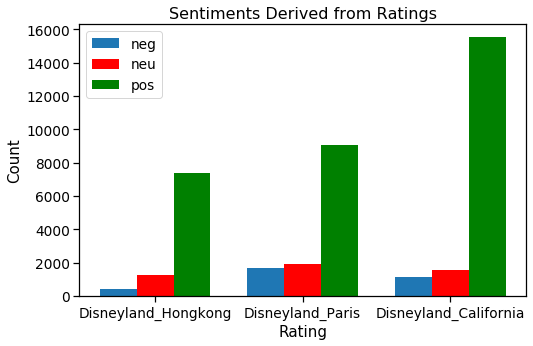

In [390]:
#Create a new figure
from matplotlib import pyplot
pyplot.figure(figsize=(8,5)) 
pyplot.title('Sentiments Derived from Ratings', fontsize=16)
pyplot.xlabel('Rating')
pyplot.ylabel('Count')

 

width = 0.25       
pyplot.bar(RatingValues, 
           UnstackedDR[LabelValues[0]], width, label=LabelValues[0])
pyplot.bar(RatingValues + width, 
           UnstackedDR[LabelValues[1]], width, color='red', label=LabelValues[1])
pyplot.bar(RatingValues + width + width, 
           UnstackedDR[LabelValues[2]], width, color='green', label=LabelValues[2])

 

pyplot.xticks(RatingValues + width, ('Disneyland_Hongkong', 'Disneyland_Paris', 'Disneyland_California'))
pyplot.legend(loc='best')
pyplot.show();

## Lexicon-based Sentiment Analysis

In [113]:
df.head(3)

,Review_ID,Rating,Sent_ML,Label,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch_Encoded,Branch,Cleaned_doc_ML
0,670772142,4,pos,1,2019-04,4,Australia,If you've ever been to Disneyland anywhere you...,1,Disneyland_HongKong,ever disneyland anywher find disneyland hong k...
1,670682799,4,pos,1,2019-05,5,Philippines,Its been a while since d last time we visit HK...,1,Disneyland_HongKong,sinc last time visit disneyland time onli stay...
2,670623270,4,pos,1,2019-04,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,1,Disneyland_HongKong,thank humid visit park otherwis would issu sha...


In [114]:
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amitjain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [379]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Sent_Lexicon = [] #Index to indicate neutral sentiment.
for r in range(len(df['Cleaned_doc_ML'])):
    message_text = df['Cleaned_doc_ML'][r]
    # Compute Sentiment Score for each review
    SentimentScores = sid.polarity_scores(message_text)
    # Generate sentiment index based on sentiment score, We set 0.3 as threshold for strong sentiments
    if SentimentScores['pos']> 0.2:
        Sent_Lexicon.append('pos')
    elif SentimentScores['neg']> 0.3:
            Sent_Lexicon.append('neg')
    elif SentimentScores['neu']> 0.5:
        Sent_Lexicon.append('neu')
#Add sentiment indixes to the original data frame.
df['Sent_Lexicon'] = Sent_Lexicon  

In [380]:
df.head(2)

,Review_ID,Rating,Sent_ML,Label,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch_Encoded,Branch,Cleaned_doc_ML,Sent_Lexicon,Cleaned_doc_LDA,Only_Nouns
0,670772142,4,pos,1,2019-04,4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the ...,1,Disneyland_HongKong,ever disneyland anywher find disneyland hong kong veri similar layout walk main street veri fami...,neu,"[similar, layout, familiar, fabul, fairli]",ever disneyland anywher find disneyland hong kong veri similar layout walk main street veri fami...
1,670682799,4,pos,1,2019-05,5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomo...",1,Disneyland_HongKong,sinc last time visit disneyland time onli stay tomorrowland marvel land iron experi newli open w...,pos,"[tomorrowland, marvel, iron, newli, ironman, featur, sceneri, central, kowloon, previou, lightye...",ever disneyland anywher find disneyland hong kong veri similar layout walk main street veri fami...


## Figure D.2

In [381]:
DivisionRating = df.groupby(['Sent_Lexicon','Branch_Encoded']).count()['Review_ID']
UnstackedDR  = DivisionRating.unstack(level=0)
RatingValues = UnstackedDR.index.values
LabelValues = UnstackedDR.keys()

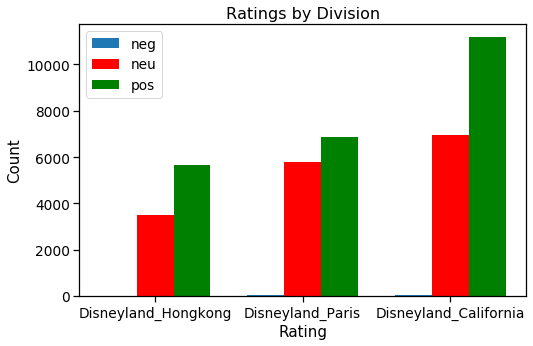

In [382]:
#Create a new figure
from matplotlib import pyplot
pyplot.figure(figsize=(8,5)) 
pyplot.title('Ratings by Division', fontsize=16)
pyplot.xlabel('Rating')
pyplot.ylabel('Count')

 

width = 0.25       
pyplot.bar(RatingValues, 
           UnstackedDR[LabelValues[0]], width, label=LabelValues[0])
pyplot.bar(RatingValues + width, 
           UnstackedDR[LabelValues[1]], width, color='red', label=LabelValues[1])
pyplot.bar(RatingValues + width + width, 
           UnstackedDR[LabelValues[2]], width, color='green', label=LabelValues[2])

 

pyplot.xticks(RatingValues + width, ('Disneyland_Hongkong', 'Disneyland_Paris', 'Disneyland_California'))
pyplot.legend(loc='best')
pyplot.show();

## ANSWER------> PART D

We have taken two approaches for sentiment analysis. 

We have created a Naive Bayes Machine Learning model and Lexicon Based Model.

**Machine Learning** is a Supervised Learning whereas **Lexicon** Based is unsupervised Learning which calculate Polarity scores to classify scores as positive, negative and neutral.


In the **Figure D.1**, it can be observed that our ML model has predicted the more Positive Reviews than compared to Lexicon based Model (Figure D.2). Moreover, Lexicon Based Model has Clustered less Negative Reviews as compared to ML model. 


In conclusion, Machine Learning based approach is better than Lexicon Based Approach

# PART E

## What are visitors’ sentiments toward theme parks aspects such as facilities and services? (define)

## POS TAGGING NOUNS

In [367]:
#Compute Sentiment Score by text trunk
from nltk.tokenize import sent_tokenize
Cleaned_doc_aspect=[]
scores = []
for r in range(len(df['Review_Text'])):
    message_text = df['Review_Text'][r]
    ReviewComment= message_text.replace(',','.')
    #sents =  sent_tokenize(ReviewComment)
    Cleaned_doc_aspect.append(ReviewComment)

In [368]:
# COnverting l2 to strings

Cleaned_doc_aspect = ",".join(Cleaned_doc_aspect)

In [370]:
sents =  sent_tokenize(Cleaned_doc_aspect)
scores = []
for s in range(len(sents)):
    scores.append(sid.polarity_scores(sents[s]))

In [395]:
[s for s in scores] #Show sentiment score of individual trunks

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.7056},
 {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3919},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.5242},
 {'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.8353},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.4199},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.582, 'neu': 0.418, 'pos': 0.0, 'compound': -0.6351},
 {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.6892},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},


## Extracting Only Nouns

In [373]:
# Extract Only Nouns
from nltk import word_tokenize, pos_tag
Cleaned_doc_nouns = [token for token, pos in pos_tag(word_tokenize(Cleaned_doc_aspect)) if pos.startswith('N')]

In [374]:
most_freq = nltk.FreqDist(Cleaned_doc_nouns)
most_freq.most_common(50)

[('park', 35641),
 ('Disney', 30240),
 ('rides', 29985),
 ('Disneyland', 27751),
 ('time', 26401),
 ('day', 25166),
 ('ride', 12373),
 ('kids', 12068),
 ('place', 11858),
 ('food', 11137),
 ('people', 9556),
 ('parks', 7971),
 ('times', 7942),
 ('days', 7884),
 ('pass', 7439),
 ('year', 6993),
 ('children', 6970),
 ('experience', 6764),
 ('characters', 6640),
 ('parade', 6543),
 ('staff', 6482),
 ('line', 6469),
 ('show', 6162),
 ('lines', 6155),
 ('fun', 6130),
 ('attractions', 6127),
 ('family', 6104),
 ('lot', 5855),
 ('visit', 5777),
 ('Paris', 5777),
 ('trip', 5542),
 ('minutes', 5510),
 ('fireworks', 5421),
 ('queues', 5385),
 ('way', 5016),
 ('Mountain', 4862),
 ('hours', 4609),
 ('years', 4585),
 ('California', 4549),
 ('everything', 4419),
 ('wait', 4407),
 ('hour', 4368),
 ('hotel', 4354),
 ('tickets', 4179),
 ('World', 4045),
 ('Park', 4033),
 ('night', 4021),
 ('things', 3641),
 ('ticket', 3491),
 ('money', 3458)]

In [386]:
from statistics import mean
#function to compute sentiment score for aspect
def aspect_sentiment(aspect,sents,scores):
    AspSen = []
    for s in range(len(sents)):
        #Check if the aspect is mentioned in the text trunk
        Index = sents[s].find(aspect)
        if Index > 0:
            AspSen.append(scores[s])
    Pos = [AspSen[x]['pos'] for x in range(len(AspSen))]
    Neg = [AspSen[x]['neg'] for x in range(len(AspSen))]
    #Return average of sentiment scores of aspect
    return [round(mean(Pos),3), round(mean(Neg),3)]


print('hotels: ', aspect_sentiment('hotels',sents,scores))  
print('lines: ', aspect_sentiment('lines',sents,scores))
print('food: ', aspect_sentiment('food',sents,scores))
print('staff: ', aspect_sentiment('staff',sents,scores))

hotels:  [0.101, 0.02]
lines:  [0.095, 0.048]
food:  [0.123, 0.05]
staff:  [0.194, 0.059]


## ANSWER ------> PART E

Follwoing are the keywords for Facility and Services:-

1. hotels
2. lines
3. Food
4. staff

According to the above score, the following aspects of facilities and services have been discussed:

1. Hotels: Visitors are very satisfied with the hotel and has a positive sentiment towards this facility.


2. lines: lines or queues have somewhat neutral sentiments


3. food: Visitors have more positive sentiments as compared to the negative. 


4. staff: For this Service, Visitors are happy with the Staff.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

# PART F


## Latent Dirichlet Allocation (LDA)


In [132]:
df.head(3)

,Review_ID,Rating,Sent_ML,Label,Year_Month,MONTH,Reviewer_Location,Review_Text,Branch_Encoded,Branch,Cleaned_doc_ML,Sent_Lexicon
0,670772142,4,pos,1,2019-04,4,Australia,If you've ever been to Disneyland anywhere you...,1,Disneyland_HongKong,ever disneyland anywher find disneyland hong k...,neu
1,670682799,4,pos,1,2019-05,5,Philippines,Its been a while since d last time we visit HK...,1,Disneyland_HongKong,sinc last time visit disneyland time onli stay...,pos
2,670623270,4,pos,1,2019-04,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,1,Disneyland_HongKong,thank humid visit park otherwis would issu sha...,pos


## POS TAGGING

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

## Function to Extract Nouns, Verbs and Adjectives Only

In [134]:
# Creating a function to pull only Nouns, Verbs and Adjectives from our Review_Text
from nltk import word_tokenize, pos_tag
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    
    is_noun = lambda pos: pos[:2].startswith('J') or pos[:2].startswith('V') or pos[:2].startswith('N') 

    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)
#if this code doesn't work on you, it's probably indentaion mistake coming from Medium writing format.

## Applying the above function

In [135]:
df['Cleaned_doc_LDA'] = df['Cleaned_doc_ML'].apply(nouns)

In [137]:
# Checking the first Review
df['Cleaned_doc_LDA'][0]

'disneyland find disneyland hong kong similar layout walk main street veri familiar feel small world absolut fabul worth visit fairli busi queue move'

## Creating a Term- Document Matrix

In [138]:
from gensim import interfaces, utils, matutils

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(df['Cleaned_doc_LDA'])
count_data

<40043x22967 sparse matrix of type '<class 'numpy.int64'>'
	with 1551682 stored elements in Compressed Sparse Row format>

## Visualizing the Frequency of words 

## Figure F.1

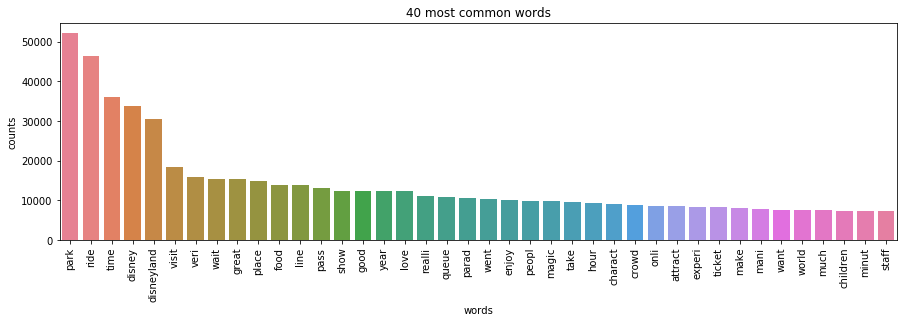

In [140]:
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]


count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4))
plt.subplot(title='40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

# Reducing the Frequent Terms

In [141]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1000 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  2016


<40043x2016 sparse matrix of type '<class 'numpy.int64'>'
	with 438331 stored elements in Compressed Sparse Row format>

## GENSIM REDUCING TERMS

In [142]:
Cleaned_doc_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(df['Cleaned_doc_LDA'])):
    each_item = []
    for t in df['Cleaned_doc_LDA'][r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item) 
    #print(Cleaned_doc_new[r])

CLEANED TEXT NEW: 


In [143]:
# Storing the Reduced Reviews in df['Cleaned_doc']
df['Cleaned_doc_LDA'] = Cleaned_doc_new

In [217]:
df['Cleaned_doc_LDA'][0]

['similar', 'layout', 'familiar', 'fabul', 'fairli']

Next, construct a term dictionary following required format of LDA module in `gensim` library:

### Creating a Term Dcitionary in the format requires of LDA in Gensim Library

In [218]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(df['Cleaned_doc_LDA'])
print(id2word.token2id)

{'fabul': 0, 'fairli': 1, 'familiar': 2, 'layout': 3, 'similar': 4, 'brand': 5, 'central': 6, 'dont': 7, 'featur': 8, 'hello': 9, 'iron': 10, 'ironman': 11, 'kowloon': 12, 'lightyear': 13, 'local': 14, 'marvel': 15, 'minu': 16, 'newli': 17, 'ocean': 18, 'previou': 19, 'sceneri': 20, 'starbuck': 21, 'suppos': 22, 'sweet': 23, 'tomorrowland': 24, 'wan': 25, 'worst': 26, 'certain': 27, 'coffe': 28, 'everywher': 29, 'gift': 30, 'grand': 31, 'humid': 32, 'interest': 33, 'longest': 34, 'otherwis': 35, 'shade': 36, 'themselv': 37, 'togeth': 38, 'underwhelm': 39, 'unfortun': 40, 'certainli': 41, 'compact': 42, 'dollar': 43, 'famou': 44, 'gone': 45, 'mainten': 46, 'midweek': 47, 'present': 48, 'citi': 49, 'fine': 50, 'accept': 51, 'basic': 52, 'call': 53, 'forget': 54, 'fountain': 55, 'mostli': 56, 'properti': 57, 'refil': 58, 'shove': 59, 'slightli': 60, 'tokyo': 61, 'cancel': 62, 'obvious': 63, 'bakeri': 64, 'biggest': 65, 'cafe': 66, 'corner': 67, 'decent': 68, 'drawback': 69, 'event': 70, '

In [221]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in df['Cleaned_doc_LDA']]
print(Corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(21, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)], [(40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(49, 1), (50, 1)], [(26, 1), (30, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(62, 1), (63, 1)], [(64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)], [(7, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)], [(85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 

## Applying Gensim Model

In [147]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.019*"complain" + 0.015*"deal" + 0.014*"buggi" + 0.013*"charg" + '
  '0.013*"europ" + 0.012*"sign" + 0.012*"didnt" + 0.011*"cheap" + 0.011*"hole" '
  '+ 0.010*"idea"'),
 (1,
  '0.017*"floor" + 0.012*"machin" + 0.012*"date" + 0.011*"menu" + '
  '0.011*"coffe" + 0.011*"poorli" + 0.010*"rock" + 0.010*"themselv" + '
  '0.010*"slip" + 0.010*"alton"'),
 (2,
  '0.027*"carribean" + 0.021*"lodg" + 0.019*"broke" + 0.015*"laser" + '
  '0.014*"lightyear" + 0.012*"cafe" + 0.011*"wander" + 0.010*"tigger" + '
  '0.010*"fantasyland" + 0.010*"beer"'),
 (3,
  '0.031*"tower" + 0.026*"buffet" + 0.020*"broken" + 0.016*"burger" + '
  '0.013*"pick" + 0.011*"terror" + 0.010*"cafe" + 0.010*"driver" + '
  '0.010*"door" + 0.010*"captain"'),
 (4,
  '0.026*"dont" + 0.024*"eurodisney" + 0.016*"fade" + 0.016*"younger" + '
  '0.014*"shuttl" + 0.013*"stitch" + 0.013*"suffer" + 0.011*"photograph" + '
  '0.011*"phone" + 0.011*"compani"'),
 (5,
  '0.012*"sell" + 0.012*"chip" + 0.012*"litter" + 0.011*"round" + '


### Computing Coherence Score

In [148]:
from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=Cleaned_doc_new, 
                                     dictionary=id2word, 
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.424837834523899


<a id = "cell_Experiment"></a>
###  Experiment with Topic Numbers to select the Best Model

In the following Code, we will make multiple LDA models with varied numbers of topics and evaluate their coherence score. 

In [149]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=Cleaned_doc_new, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores 
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.3171622409219222
Topic Number: 3 -- Coherence: 0.39729388004396543
Topic Number: 4 -- Coherence: 0.35467060768259584
Topic Number: 5 -- Coherence: 0.4006777983606118
Topic Number: 6 -- Coherence: 0.3875197019196848
Topic Number: 7 -- Coherence: 0.4107070039517341
Topic Number: 8 -- Coherence: 0.4417670892925956
Topic Number: 9 -- Coherence: 0.4349756150145399
Topic Number: 10 -- Coherence: 0.424837834523899


## Figure F.2

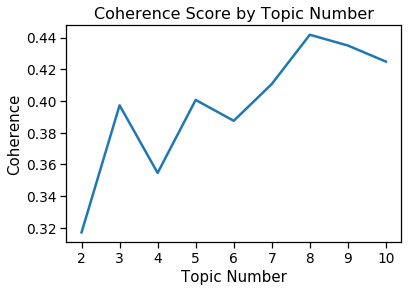

In [222]:
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence');

## Best Model

In [279]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(0,
  '0.013*"complain" + 0.012*"sign" + 0.010*"poorli" + 0.010*"deal" + 0.010*"autograph" + 0.009*"imagin" + 0.009*"rock" + 0.009*"buggi" + 0.008*"shut" + 0.008*"alton"'),
 (1,
  '0.021*"dirti" + 0.020*"broken" + 0.017*"poor" + 0.016*"franc" + 0.012*"machin" + 0.010*"pushchair" + 0.009*"coffe" + 0.008*"terribl" + 0.008*"kept" + 0.008*"build"'),
 (2,
  '0.019*"carribean" + 0.015*"cafe" + 0.012*"captain" + 0.012*"laser" + 0.011*"menu" + 0.009*"search" + 0.009*"phantom" + 0.007*"broke" + 0.007*"enabl" + 0.007*"fresh"'),
 (3,
  '0.024*"tower" + 0.024*"villag" + 0.016*"burger" + 0.013*"disabl" + 0.013*"chip" + 0.012*"eurostar" + 0.010*"lodg" + 0.009*"terror" + 0.009*"pick" + 0.009*"shuttl"'),
 (4,
  '0.019*"santa" + 0.016*"dont" + 0.015*"european" + 0.014*"younger" + 0.013*"childhood" + 0.013*"partner" + 0.012*"pavement" + 0.012*"shuttl" + 0.012*"american" + 0.011*"memori"'),
 (5,
  '0.021*"villag" + 0.013*"comfort" + 0.012*"wear" + 0.011*"lodg" + 0.011*"hole" + 0.010*"rainforest" + 0.009

# Finding the most representative Document for each Topic

In [287]:
data = df.Review_Text.values.tolist()

def format_topics_sentences(ldamodel=None, corpus=Corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[Corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4),
                                                                  topic_keywords]), 
                                                                    ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=Corpus, texts=df['Review_Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [301]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9561,"complain, sign, poorli, deal, autograph, imagin, rock, buggi, shut, alton","Unlike Universal or Ocean park, Disneyland does not have concept of express pass. However they d..."
1,1.0,0.9562,"dirti, broken, poor, franc, machin, pushchair, coffe, terribl, kept, build",The castle was closed! No Street Parade! Pricey food and souvenirs! When they will re open the c...
2,2.0,0.9513,"carribean, cafe, captain, laser, menu, search, phantom, broke, enabl, fresh",Return visit. Smaller than Paris one but ok for a day. Went on a weekend but longest we queued w...
3,3.0,0.9484,"tower, villag, burger, disabl, chip, eurostar, lodg, terror, pick, shuttl","After living in Hong Kong for a few months, I had not heard great things about HK Disneyland. Bu..."
4,4.0,0.9416,"santa, dont, european, younger, childhood, partner, pavement, shuttl, american, memori",A great day out even for adults.We can early and we're able to do almost all rides in a couple o...
5,5.0,0.9485,"villag, comfort, wear, lodg, hole, rainforest, larg, round, februari, shoe",Compared to other Disneyland this is just a small portion compacted altogether what they have..I...
6,6.0,0.9452,"buffet, call, english, shock, crush, game, inform, readi, websit, technic","Just wanted to post a warning to anyone visiting Disneyland in the spring 2012. Yes, they are ha..."
7,7.0,0.9539,"snow, lightyear, shuttl, litter, eurodisney, dumbo, floor, fantasyland, flight, wild",My 3 yr old and 7 yr old girls loved it very bit. The idea was to let them see the characters an...


In [358]:
sent_topics_sorteddf_mallet['Representative Text'][3]  ## Change the index value to obtain the required Topic

"After living in Hong Kong for a few months, I had not heard great things about HK Disneyland. But, I decided to go with some friends and had a really fantastic time! We got there right when it opened and the lines were quite short in the morning. We didn't spend more than 20 minutes in a line! The park is small; I was able to go on my favorite rides multiple times throughout the day, with and without fast passes. Because of its size, visiting the park is one day is more than feasible. I personally loved Space Mountain and Grizzly Gulch rollercoasters.The food was not as good as food at other Disney parks. The Mickey waffles and ice cream were tasty, but the popcorn wasn't warm and the sandwiches from bakeries on in Street barely had any meat and cheese in them. I recommend bringing your own food into the park.I wouldn't get a season pass for HK Disney because it's too small and it would get old quickly if I went there too often, but I will definitely visit every once in a while!"

In [ ]:
# With the following Code, we can look at each Representative Texts by their desceding Probability Topic Contribution

df_texts = df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 3.0]\  # Change the required Topic number 
                .sort_values(by='Topic_Perc_Contrib', ascending =False)\
                .reset_index()

df_texts['Text'][1] ## Change for the required Representative Text

## Answer ---------> Part F

The above table shows us the most matching Review in each Topic

By Reading the Each Review Text in the above 8 Topics, the Following are the Concerns and Interests of the Visitors that are identified by studying each Topic.

The Visitors are mainly "Concerned" about the following:-

1. Food quality and its expensive price 
2. the long Wait time and queues 
3. lack of shade in hot weather -----> 4, 
4. Very Long Walks 

The Visitors are mainly "Interested" about the following:-

1. Iron Man Experience
2. Fireworks
3. Space Mountain
4. Grizzly Gulch Rollercoasters
5. Shopping, Disney Gifts and Clothing.

The most Concerns and Interests are discussed in Topic 2, 3 and 4.

Topic 2 mostly talks about the Concerns related to Food Quality, its tastes and its expensive Price. 

Topic 3 is a bit about the concerns related to Food and mainly interests in Experiences such as Iron Man Ride, Grizzly Gulch Rollercoasters and Space Mountain. 

Topic 4 mostly talks about the concerns related to Long Walks, lack of Shades in Hot Weather. Also, it talks about the interests of Adults in Shopping liek Disney gifts and Clothing. 

All the above three topics and mostly all the topics show concerns regarding the Very Long Queues and Long waiting Time. 

Also, the topics show interests in Fireworks.


### Strengths and Weaknesses of SVD and LDA:-

The Follwoing are the Strengths and Weaknesses of SVD and LDA are:-

1. SVD does not require to specify the number of Topics as compared to LDA where we have to select the number of   Topics. 



2. Moroever, it works both with TF-IDF and Term Frequency Representation.


3. SVD is computationally expensive and intensive as compared to LDA which is relatively fast.


4. LDA performs better than with more meaningful results. 


5. Also, its easy to update as new data comes in.

# PART G

## Figure G.1

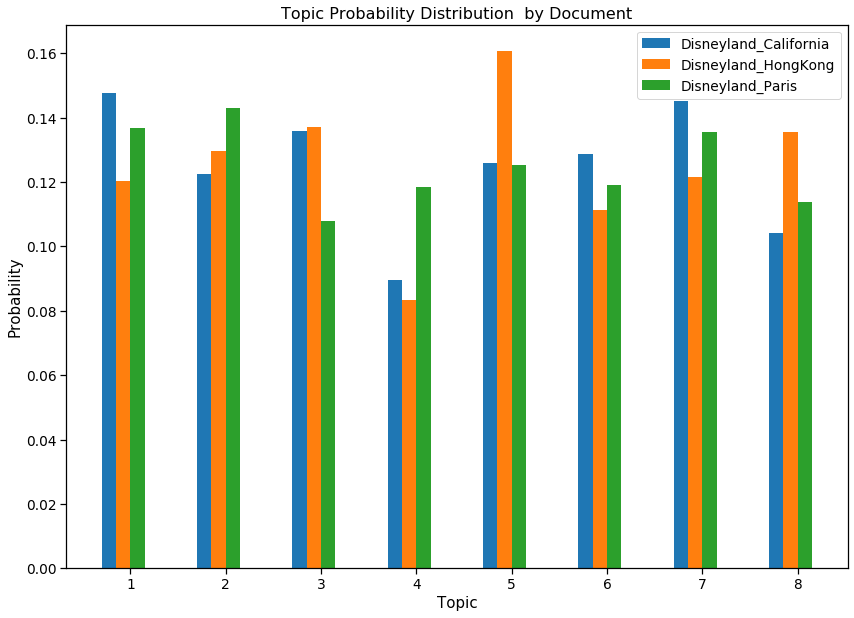

In [168]:
Selected_Branch = ['Disneyland_California', 'Disneyland_HongKong', 'Disneyland_Paris']
Group_Prob = []
for i in range(len(Selected_Branch)):
    Index = df['Branch'] == Selected_Branch[i]
    Corpus_Selected = [Corpus[i] for i, x in enumerate(Index) if x]
    GroupDoc_Pro = lda_model.get_document_topics(Corpus_Selected)
    Margina_Pro = np.zeros(8) #Replace the number in bracket with the number of topics in your best model
    for doc in range(len(GroupDoc_Pro)):
        EachDoc = GroupDoc_Pro[doc]
        for top in range(len(EachDoc)):
            EachTopic = EachDoc[top]
            Margina_Pro[EachTopic[0]] = Margina_Pro[EachTopic[0]] + EachTopic[1]          
    Group_Prob.append(Margina_Pro/sum(Margina_Pro))

Bar_index = np.asarray(range(1,lda_model.num_topics+1))
pyplot.figure(figsize=(14,10)) 
pyplot.title('Topic Probability Distribution  by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
width = 0.15   
for i in range(len(Selected_Branch)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Branch[i])
    
pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show();

## ANSWER ------> Part G

#### Due to the change in the index, the chosen Topics in the above graph are 3, 4 and 5.

We have picked our Concerns from Topics 3, 4 and 5. 

We will define the Differences Theme Park Wise:

First of all, we will define what are the Concerns and Interests in the Chosen topics:-

1. Topic 3 mostly talks about the Concerns related to Food Quality, its tastes and its expensive Price. 


2. Topic 4 is a bit about the concerns related to Food and mainly interests in Experiences such as Iron Man Ride,        Grizzly Gulch Rollercoasters and Space Mountain. 


3. Topic 5 mostly talks about the concerns related to Long Walks, lack of Shades in Hot Weather. Also, it talks about    the interests of Adults in Shopping liek Disney gifts and Clothing. 


We will discuss the differences according to the chosen Topics:-

Topic 3:

As we can observe in the graph, DisneyLand California and HongKong have the same concerns, whereas DisneyLand Paris shows a bit less concerned reqarding the Food.

Topic 4:

The concerns and interests of DisneyLand California and HongKong are same where as Topic 4 is more popular in DisneyLand Paris.

Topic 5:

The concerns and interests of DisneyLand California and Paris are same where as Topic 5 is more popular in DisneyLand HongKong.

To conclude, visitors at DisneyLand California mostly have concerned related to food, followed by Lack of Shade and Interests in Iron Man Ride, Space Mountain and other experiences.

Visitors at DisneyLand HongKong are mostly concerned regarding the Lack of Shades and interests in Shopping. 

Visitors at DisneyLand Paris have mostly equal concerns and interests.


# PART H

## Figure H.1

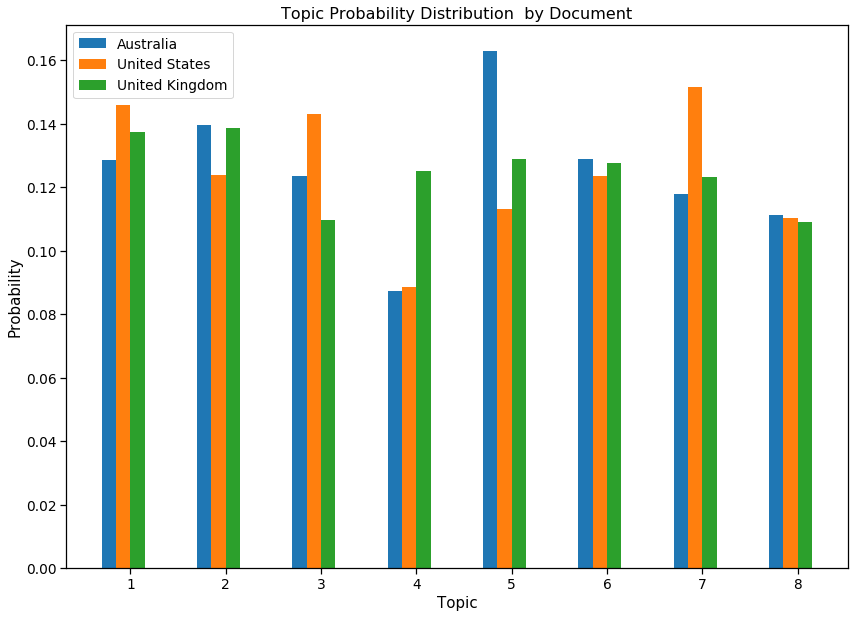

In [170]:
import numpy as np

Selected_Location = ['Australia','United States','United Kingdom']

Group_Prob = []
for i in range(len(Selected_Location)):
    Index = df['Reviewer_Location'] == Selected_Location[i]
    Corpus_Selected = [Corpus[i] for i, x in enumerate(Index) if x]
    GroupDoc_Pro = lda_model.get_document_topics(Corpus_Selected)
    Margina_Pro = np.zeros(8) #Replace the number in bracket with the number of topics in your best model
    for doc in range(len(GroupDoc_Pro)):
        EachDoc = GroupDoc_Pro[doc]
        for top in range(len(EachDoc)):
            EachTopic = EachDoc[top]
            Margina_Pro[EachTopic[0]] = Margina_Pro[EachTopic[0]] + EachTopic[1]          
    Group_Prob.append(Margina_Pro/sum(Margina_Pro))

Bar_index = np.asarray(range(1,lda_model.num_topics+1))
pyplot.figure(figsize=(14,10)) 
pyplot.title('Topic Probability Distribution  by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
width = 0.15   
for i in range(len(Selected_Location)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Location[i])
    
pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show();

## ANSWER -----> PART H

#### Due to the change in the index, the chosen Topics in the above graph are 3, 4 and 5.

We have picked our Concerns from Topics 3, 4 and 5. 

We will define the Differences according to Visitors group:

First of all, we will define what are the Concerns and Interests in the Chosen topics:-

1. Topic 3 mostly talks about the Concerns related to Food Quality, its tastes and its expensive Price. 


2. Topic 4 is a bit about the concerns related to Food and mainly interests in Experiences such as Iron Man Ride,        Grizzly Gulch Rollercoasters and Space Mountain. 


3. Topic 5 mostly talks about the concerns related to Long Walks, lack of Shades in Hot Weather. Also, it talks about    the interests of Adults in Shopping liek Disney gifts and Clothing. 


The concerns and interests of DisneyLand California and Paris are same where as Topic 5 is more popular in DisneyLand HongKong.

To conclude, visitors from United States mostly have concerned related to food, followed by Lack of Shade whereas, they have Interest in Shopping from Disney Outlets

Visitors from Australia are mostly concerned regarding the Lack of Shades, followed by the Food quality and its Pricing whereas they have high interests in Shopping.

Visitors from United Kingdom have almost equal concerns and interests.  


<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

## Following are some Recommendations:-

The Management Team is looking to create a better customer experience by improving their customer service. 

Following are the recommendations that could help in solving the business problem:-

1. Many Visitors have found Food Quality to be decreasing despite its expensive Price. A special focus on maintaining the Food Quality is needed.



2. Many Visitors have concerns regarding the Long waiting time for the Rides. The number of most popular Rides could be doubled or the capacity could be increased to accommodate more customers. This could result in short Waiting times. 




3. Also, in Hot Weather, Visitors were concerned regarding lack of Shade areas. If more shade areas where Visitors could rest, then that would really enhance the customer experience.  

### References: 

https://towardsdatascience.com/topic-modeling-with-nlp-on-amazon-reviews-an-application-of-latent-dirichlet-allocation-lda-ae42a4c8b369

https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/